In [1]:
import os 


# Basic
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Monitoring
from tqdm.notebook import tqdm

# IO
from os.path import join, exists, basename, dirname, splitext, expanduser
from glob import glob

# Parallel processing
from joblib import Parallel, delayed
import geopandas as gpd

from astra.plot.utils import latexify


In [2]:
shapefile_path="/home/rishabh.mondal/Brick-Kilns-project/albk_rishabh/albk_v2/YOLO_LOCALIZATION/shapefiles/india_districtwise_shapefile_2022/DISTRICT_BOUNDARY.shp"

df = gpd.read_file(shapefile_path).to_crs(epsg=4326)

In [3]:
display(df.head())


,District,STATE,REMARKS,State_LGD,DISTRICT_L,Shape_Leng,Shape_Area,geometry
0,MORBI,GUJAR>T,None,24,673,539476.764723,4.791280e+09,"POLYGON ((71.1172 23.21252, 71.11778 23.21247,..."
1,AHMAD>B>D,GUJAR>T,None,24,438,857254.094647,6.966374e+09,"POLYGON ((71.97206 23.05747, 71.97204 23.05749..."
2,>NAND,GUJAR>T,None,24,440,393046.690523,3.054307e+09,"POLYGON ((73.02614 22.73478, 73.02693 22.73474..."
3,DEVBHUMI DW>RKA,GUJAR>T,None,24,674,661732.986530,4.002784e+09,"MULTIPOLYGON (((69.33941 22.38597, 69.33976 22..."
4,J>MNAGAR,GUJAR>T,None,24,447,737428.071884,5.694271e+09,"MULTIPOLYGON (((70.5365 22.40753, 70.53635 22...."


In [4]:
df['District'] = df['District'].str.replace('>', 'A')
df['STATE'] = df['STATE'].str.replace('>', 'A')
df['District'] = df['District'].str.replace('|', 'I')
display(df.head())

,District,STATE,REMARKS,State_LGD,DISTRICT_L,Shape_Leng,Shape_Area,geometry
0,MORBI,GUJARAT,None,24,673,539476.764723,4.791280e+09,"POLYGON ((71.1172 23.21252, 71.11778 23.21247,..."
1,AHMADABAD,GUJARAT,None,24,438,857254.094647,6.966374e+09,"POLYGON ((71.97206 23.05747, 71.97204 23.05749..."
2,ANAND,GUJARAT,None,24,440,393046.690523,3.054307e+09,"POLYGON ((73.02614 22.73478, 73.02693 22.73474..."
3,DEVBHUMI DWARKA,GUJARAT,None,24,674,661732.986530,4.002784e+09,"MULTIPOLYGON (((69.33941 22.38597, 69.33976 22..."
4,JAMNAGAR,GUJARAT,None,24,447,737428.071884,5.694271e+09,"MULTIPOLYGON (((70.5365 22.40753, 70.53635 22...."


In [5]:
## display the shapefile where district name is "central delhi"
df[df['STATE'] == 'DELHI']



,District,STATE,REMARKS,State_LGD,DISTRICT_L,Shape_Leng,Shape_Area,geometry
79,CENTRAL,DELHI,None,7,77,92366.024115,1.031860e+08,"POLYGON ((77.2143 28.78524, 77.21521 28.78514,..."
127,EAST,DELHI,None,7,78,24536.830597,3.051072e+07,"POLYGON ((77.28857 28.65789, 77.28915 28.65786..."
266,NEW DELHI,DELHI,None,7,79,80699.250792,1.516238e+08,"POLYGON ((77.20369 28.64315, 77.20406 28.64298..."
269,NORTH,DELHI,None,7,80,110611.976578,2.821832e+08,"POLYGON ((77.09917 28.87068, 77.09999 28.87062..."
272,NORTH EAST,DELHI,None,7,81,47370.029510,3.420590e+07,"POLYGON ((77.23588 28.77073, 77.23606 28.76963..."
275,NORTH WEST,DELHI,None,7,82,93419.727279,1.490329e+08,"POLYGON ((76.96044 28.81534, 76.96176 28.81481..."
324,SHAHADRA,DELHI,None,7,671,33443.796616,3.328784e+07,"POLYGON ((77.32015 28.713, 77.32036 28.71291, ..."
344,SOUTH,DELHI,None,7,83,69956.042370,1.541412e+08,"MULTIPOLYGON (((77.23676 28.5578, 77.23683 28...."
350,SOUTH WEST,DELHI,None,7,84,111613.647824,2.741778e+08,"POLYGON ((76.95268 28.66884, 76.95287 28.66848..."
382,WEST,DELHI,None,7,85,73954.338201,1.272090e+08,"POLYGON ((76.97643 28.69939, 76.9763 28.69916,..."


In [6]:
df[df['STATE']=='HARYANA']

,District,STATE,REMARKS,State_LGD,DISTRICT_L,Shape_Leng,Shape_Area,geometry
445,AMBALA,HARYANA,None,6,58,379482.603591,1.473788e+09,"MULTIPOLYGON (((76.63833 30.14762, 76.63776 30..."
461,BHIWANI,HARYANA,None,6,59,386681.018029,3.186629e+09,"POLYGON ((76.01183 29.06029, 76.01279 29.06018..."
478,FARIDABAD,HARYANA,None,6,60,151373.000898,7.188564e+08,"MULTIPOLYGON (((77.16826 28.2933, 77.16954 28...."
480,FATEHABAD,HARYANA,None,6,61,325531.834462,2.453477e+09,"POLYGON ((75.8004 29.80726, 75.80152 29.80656,..."
489,GURUGRAM,HARYANA,None,6,62,248625.676773,1.209068e+09,"POLYGON ((77.00884 28.54034, 77.00947 28.53992..."
492,HISAR,HARYANA,None,6,63,419949.440637,3.950343e+09,"POLYGON ((75.94347 29.57496, 75.94418 29.57496..."
502,JHAJJAR,HARYANA,None,6,64,309139.087580,1.798824e+09,"POLYGON ((76.66888 28.80487, 76.66903 28.80433..."
503,JIND,HARYANA,None,6,65,405414.555191,2.649068e+09,"POLYGON ((76.20214 29.84311, 76.20269 29.84301..."
504,KAITHAL,HARYANA,None,6,66,361977.802493,2.209712e+09,"POLYGON ((76.42274 30.19224, 76.42352 30.1917,..."
507,KARNAL,HARYANA,None,6,67,349782.077342,2.405777e+09,"POLYGON ((77.11882 29.99219, 77.11982 29.99117..."


In [7]:
df[df['STATE']=='UTTAR PRADESH']

,District,STATE,REMARKS,State_LGD,DISTRICT_L,Shape_Leng,Shape_Area,geometry
13,AGRA,UTTAR PRADESH,None,9,118,787929.478603,3.902791e+09,"POLYGON ((78.18117 27.40699, 78.18201 27.4065,..."
16,ALIGARH,UTTAR PRADESH,None,9,119,498779.443328,3.585997e+09,"POLYGON ((77.84597 28.17343, 77.84706 28.17249..."
21,AMBEDKARNAGAR,UTTAR PRADESH,None,9,121,384817.943754,2.242461e+09,"POLYGON ((82.49758 26.6373, 82.49814 26.63724,..."
22,AMETHI,UTTAR PRADESH,None,9,640,396742.737994,2.336052e+09,"POLYGON ((81.58321 26.65383, 81.58875 26.65304..."
23,AMROHA,UTTAR PRADESH,None,9,154,364954.379714,2.379925e+09,"POLYGON ((78.65679 29.14532, 78.65757 29.1445,..."
...,...,...,...,...,...,...,...,...
354,SULTANPUR,UTTAR PRADESH,None,9,185,461970.437515,2.575457e+09,"POLYGON ((81.75984 26.54609, 81.76054 26.54595..."
371,UNNAO,UTTAR PRADESH,None,9,186,535830.605333,4.401976e+09,"POLYGON ((80.26909 27.02683, 80.26909 27.02683..."
375,VARANASI,UTTAR PRADESH,None,9,187,293845.549548,1.474824e+09,"POLYGON ((83.03696 25.55796, 83.03841 25.55557..."
403,PRAYAGRAJ,UTTAR PRADESH,None,9,120,578851.533115,5.265361e+09,"POLYGON ((81.94656 25.74023, 81.94704 25.74008..."


In [8]:
##print all the district name where state is uttar pradesh
df[df['STATE']=='RAJASTHAN']['District'].values

array(['AJMER', 'ALWAR', 'BANSWARA', 'BARAN', 'BARMER', 'BHARATPUR',
       'BHILWARA', 'BIKANER', 'B@NDI', 'CHITTAURGARH', 'CH@RU', 'DAUSA',
       'DHAULPUR', 'D@NGARPUR', 'HANUMANGARH', 'JAIPUR', 'JAISALMER',
       'JALOR', 'JHALAWAR', 'JHUNJHUN@N', 'JODHPUR', 'KARAULI',
       'GANGANAGAR', 'KOTA', 'NAGAUR', 'PALI', 'PRATAPGARH', 'RAJ SAMAND',
       'SAWAI MADHOPUR', 'SIKAR', 'SIROHI', 'TONK', 'UDAIPUR'],
      dtype=object)

In [9]:
## print all up districts which comes underncr region
ncr_districts = ['GHAZIABAD',
                 'GAUTAMBUDHNAGAR',
                   'MEERUT', 'BULANDSHAHR', 'HAPUR',
                     'BAGHPAT', 'MUZAFFARNAGAR', 'SHAMLI','BHIWANI', 'FARIDABAD', 
                     'GURUGRAM', 'MAHENDRAGARH', 'REWARI', 'PALWAL', 'JHAJJAR', 'MEWAT', 'SONIPAT', 'PANIPAT',
                       'ROHTAK', 'JIND', 'KARNAL',
                       'CHARKHI DADRI',
                       'CENTRAL',  'NEW DELHI','NORTH EAST',
                        'NORTH WEST', 'SHAHADRA', 
                        'SOUTH EAST','ALWAR','BHARATPUR']
ncr_df = df[df['District'].isin(ncr_districts)]
display(len(ncr_df))


30

<Axes: >

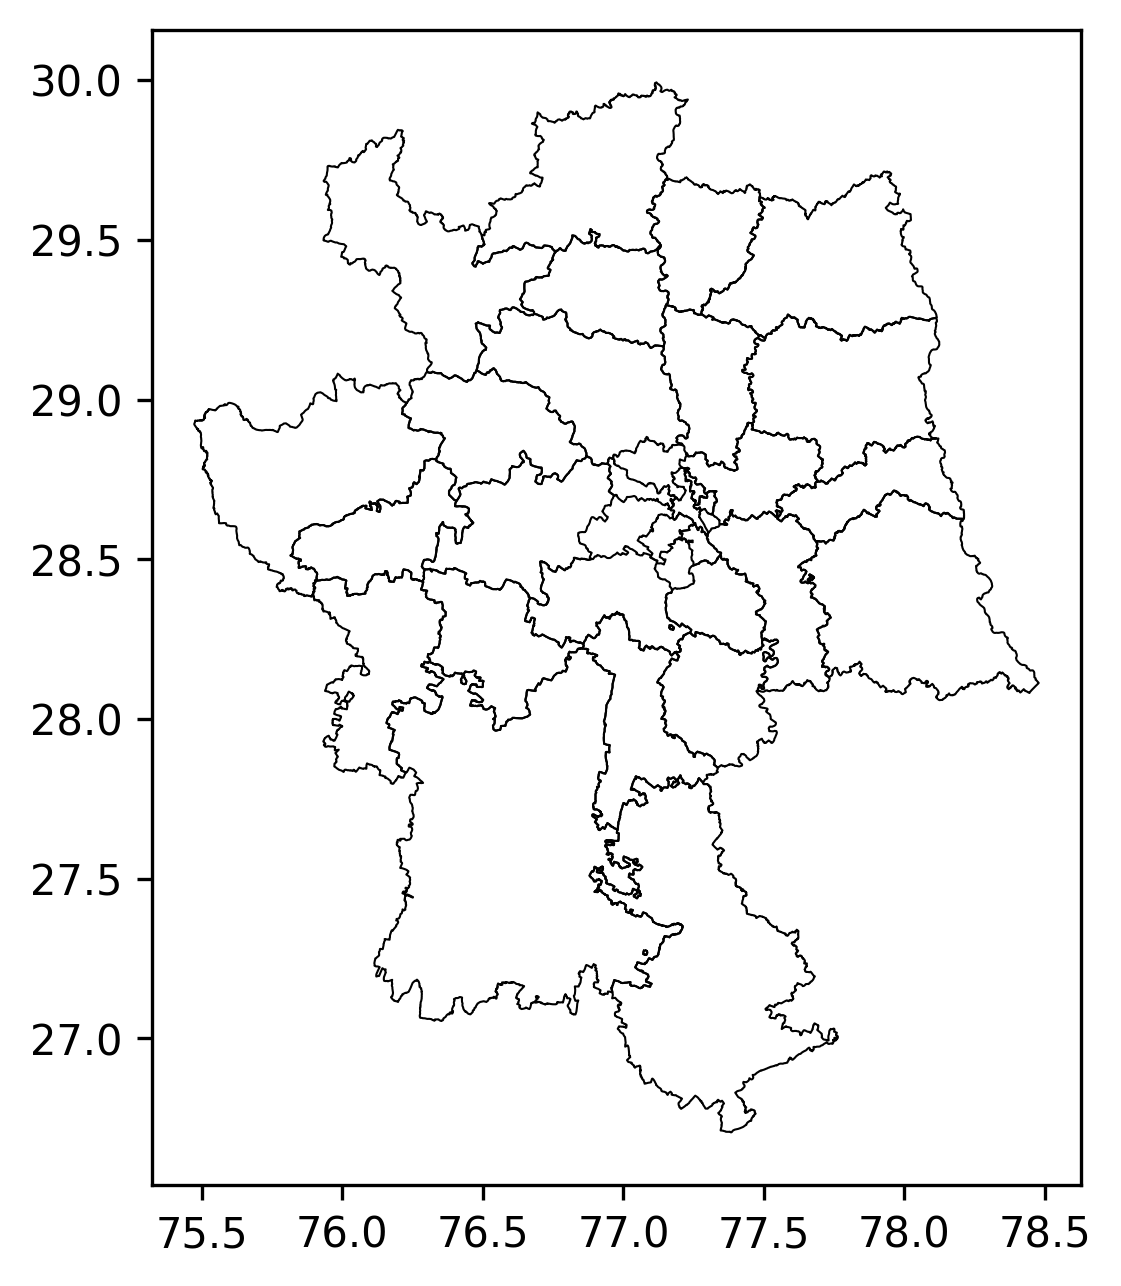

In [10]:
fig, ax = plt.subplots(dpi=300, figsize=(6, 5))
ncr_df.plot(ax=ax, color="none", edgecolor="black", linewidth=0.5)

In [11]:
# india_shape = gpd.read_file("../raw_shapefiles/India-State-and-Country-Shapefile-Updated-Jan-2020/India_State_Boundary.shp").to_crs("EPSG:4326")

kiln_locations = []
for state in ["uttar_pradesh", "bihar", "west_bengal", "haryana", "punjab"]:
    kiln_locations.append(gpd.read_file(f"/home/patel_zeel/kiln_compass_24/final_data/labels/{state}.geojson").to_crs("EPSG:4326"))
    
all_kilns_gdf = pd.concat(kiln_locations, ignore_index=True)
len(all_kilns_gdf)

30638

In [12]:
ncr_kilns_gdf = gpd.sjoin(all_kilns_gdf, ncr_df, how="inner")
ncr_kilns_gdf.head()


,class_name,confidence,max_lon,min_lon,max_lat,min_lat,center_lat,center_lon,width_of_box,height_of_box,...,image_center_y,resolution,index_right,District,STATE,REMARKS,State_LGD,DISTRICT_L,Shape_Leng,Shape_Area
392,Zigzag,1.000000,77.713012,77.711831,28.632415,28.631113,28.631764,77.712422,115.516308,144.337175,...,NaN,NaN,160,HAPUR,UTTAR PRADESH,None,9,661,246171.836916,1.081375e+09
393,Zigzag,0.957393,77.269406,77.268001,28.896197,28.895197,28.895697,77.268704,136.976634,110.847422,...,NaN,NaN,34,BAGHPAT,UTTAR PRADESH,None,9,124,218392.986381,1.281800e+09
411,Zigzag,0.957552,77.408647,77.407173,28.996799,28.995468,28.996134,77.407910,143.599228,147.488190,...,NaN,NaN,34,BAGHPAT,UTTAR PRADESH,None,9,124,218392.986381,1.281800e+09
416,Zigzag,1.000000,77.890942,77.889639,29.524163,29.523163,29.523663,77.890290,126.322805,110.856276,...,NaN,NaN,256,MUZAFFARNAGAR,UTTAR PRADESH,None,9,172,343519.238829,2.657073e+09
442,FCBK,0.956776,78.075846,78.074732,28.776447,28.775610,28.776028,78.075289,108.857782,92.782555,...,NaN,NaN,160,HAPUR,UTTAR PRADESH,None,9,661,246171.836916,1.081375e+09


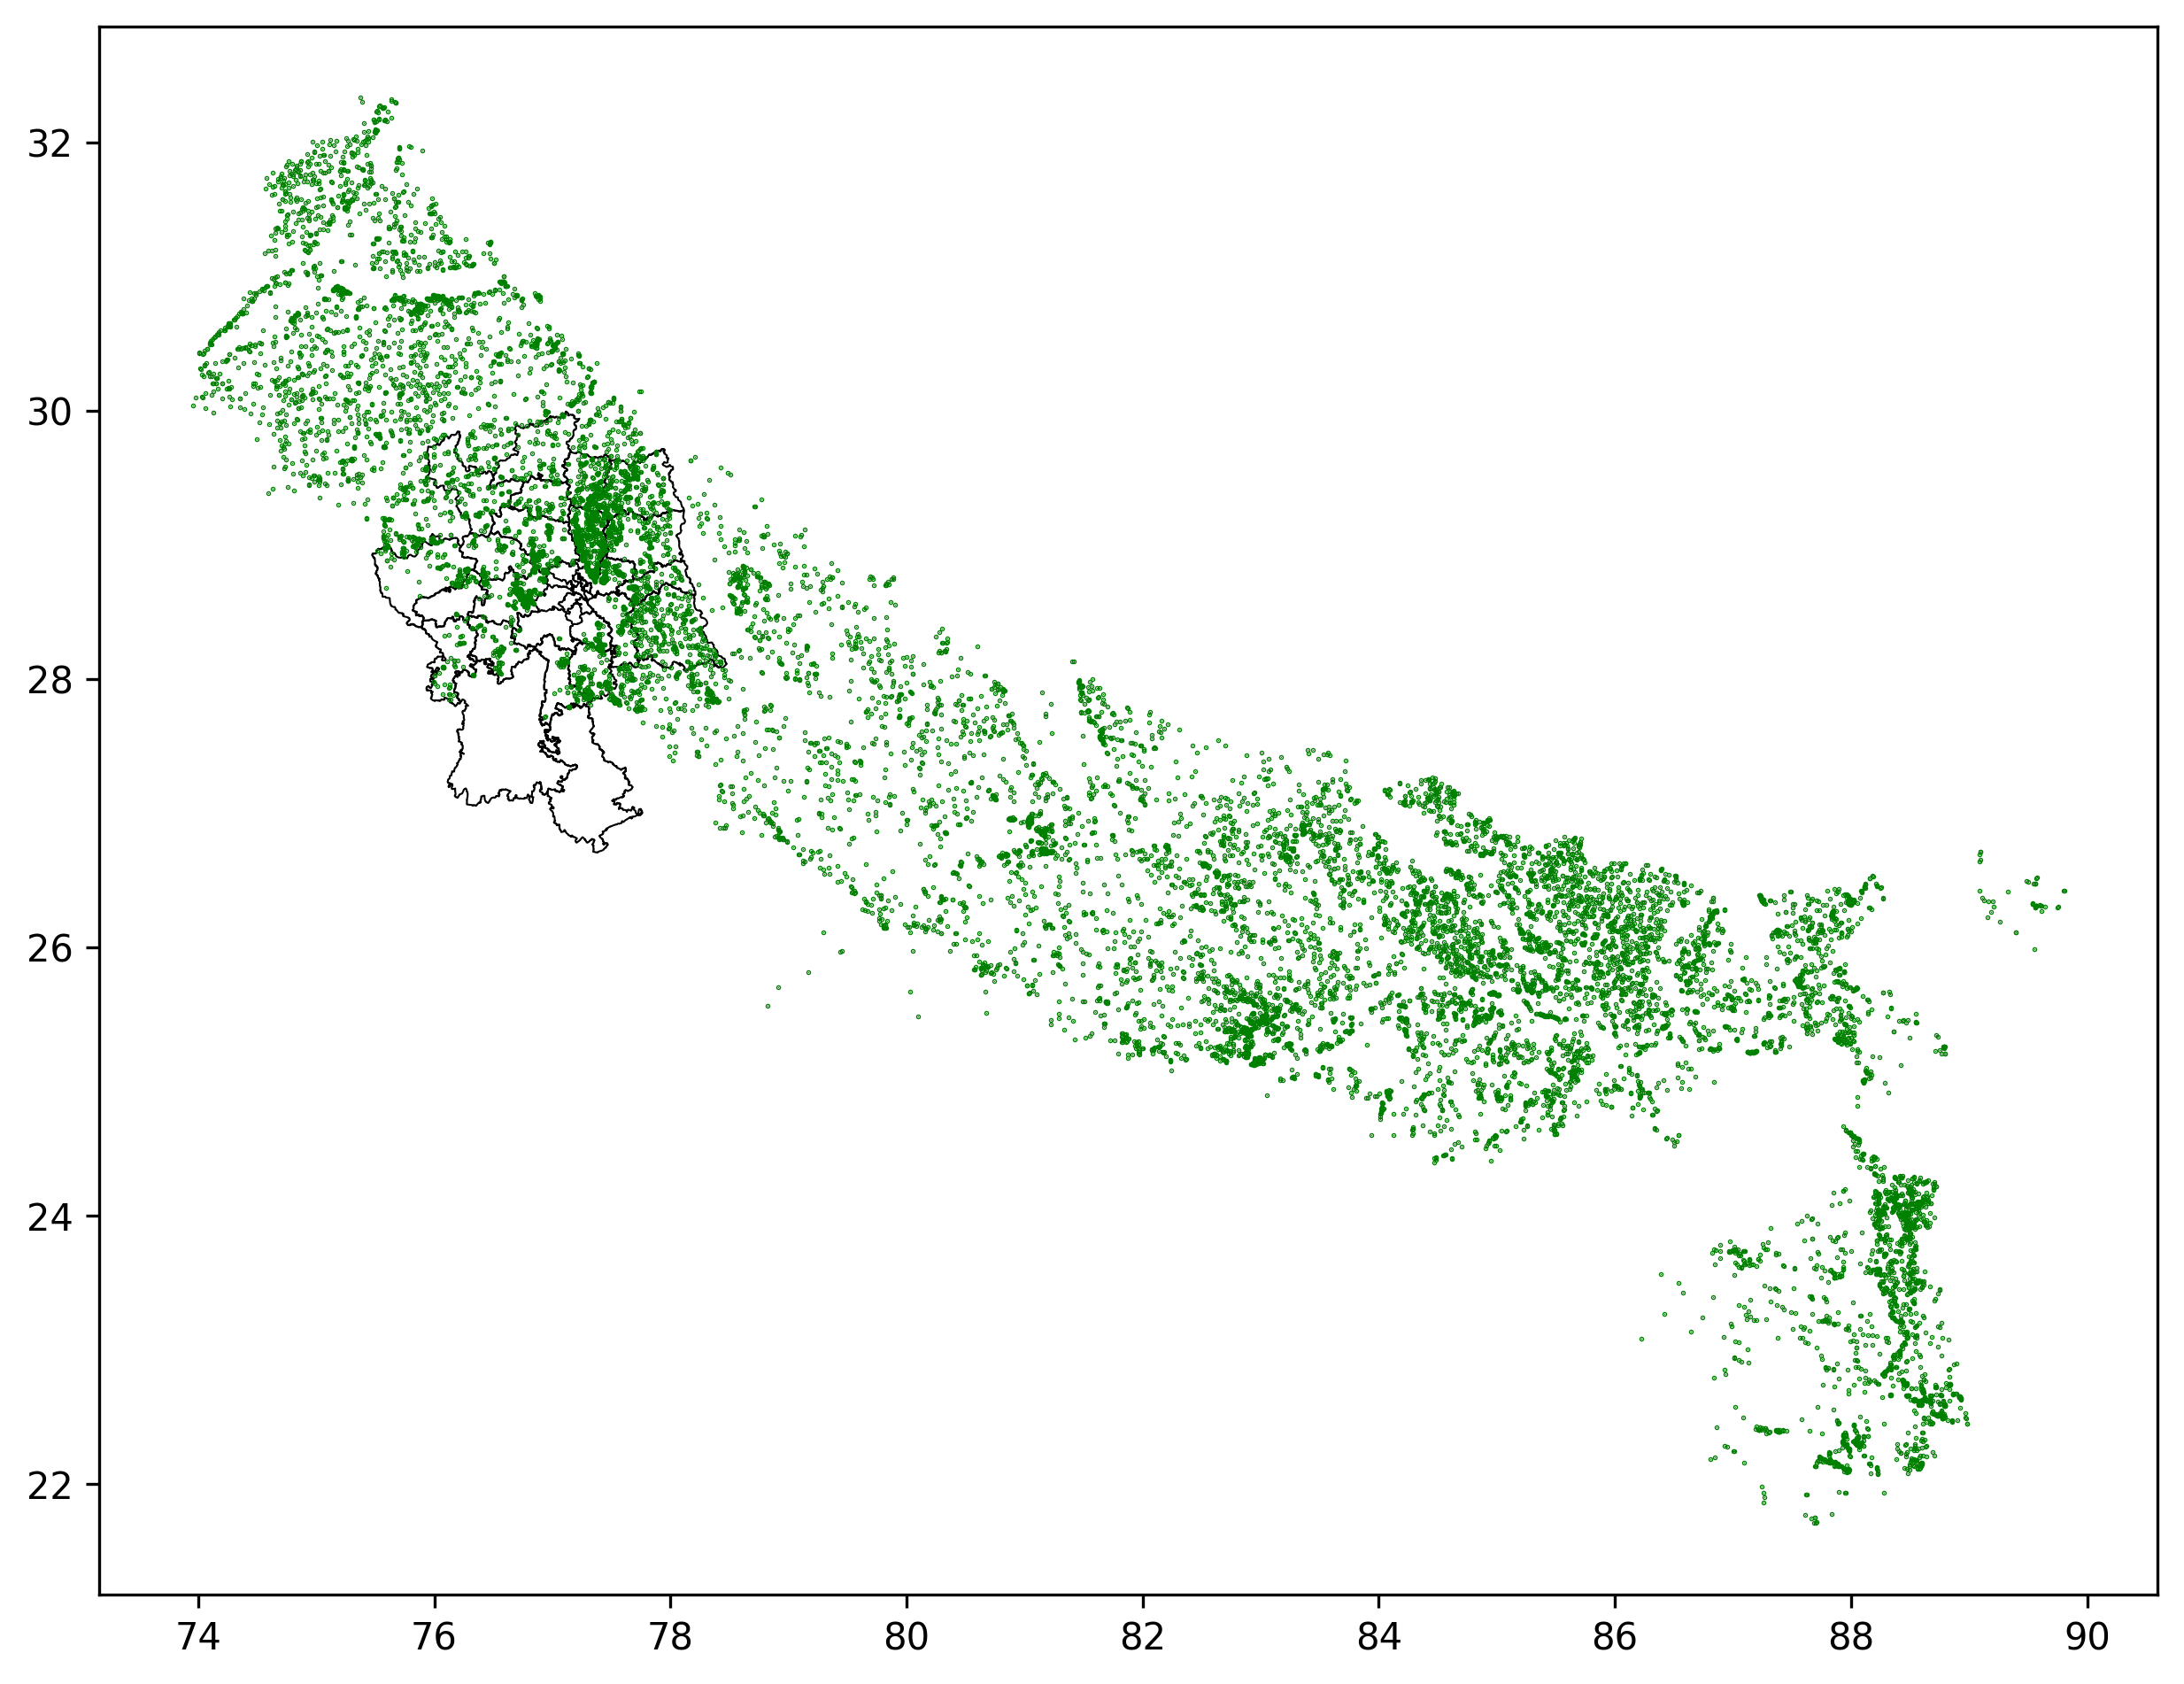

In [13]:
# latexify(5, 2, font_size=10)

kiln_tech = "CFCBK"
kiln_tech = "FCBK"
kiln_tech = "Zigzag"

fig, ax = plt.subplots(dpi=300, figsize=(10, 10))
ncr_df.plot(ax=ax, color="none", edgecolor="black", linewidth=0.5)

# scatter plot of the kiln locations
CFCBK_kilns = all_kilns_gdf[all_kilns_gdf["class_name"] == "CFCBK"]
FCBK_kilns = all_kilns_gdf[all_kilns_gdf["class_name"] == "FCBK"]
Zigzag_kilns = all_kilns_gdf[all_kilns_gdf["class_name"] == "Zigzag"]

if kiln_tech == "CFCBK":
    ax.scatter(CFCBK_kilns.center_lon, CFCBK_kilns.center_lat, s=0.1, color='red')
elif kiln_tech == "FCBK":
    ax.scatter(FCBK_kilns.center_lon, FCBK_kilns.center_lat, s=0.1, color='orange')
elif kiln_tech == "Zigzag":
    ax.scatter(Zigzag_kilns.center_lon, Zigzag_kilns.center_lat, s=0.1, color='green')

# ax.set_aspect("equal")
# ax.set_axis_off()
# ax.set_xlim(73, 89.1)
# ax.set_ylim(21.6, 32.5)

# ax.text(78, 27.2, "Uttar Pradesh", fontsize=20, alpha=0.8)
# ax.text(85.5, 25.2, "Bihar", fontsize=20, alpha=0.8)
# ax.text(86.5, 22.5, "West\nBengal", fontsize=20, alpha=0.8)
# ax.text(75, 29, "Haryana", fontsize=20, alpha=0.8)
# ax.text(74.4, 30.3, "Punjab", fontsize=20, alpha=0.8)

# ax.text(74.5, 26.5, "Delhi", fontsize=20, alpha=0.8)

# # draw a quiver between the two points
# ax.quiver(75.5, 27, 1.65, 1.65, scale=1, scale_units='xy', angles='xy', color='black', width=0.004)

# # fig.savefig(f"../figures/kiln_locations_{kiln_tech}.png", bbox_inches="tight", dpi=300)

278


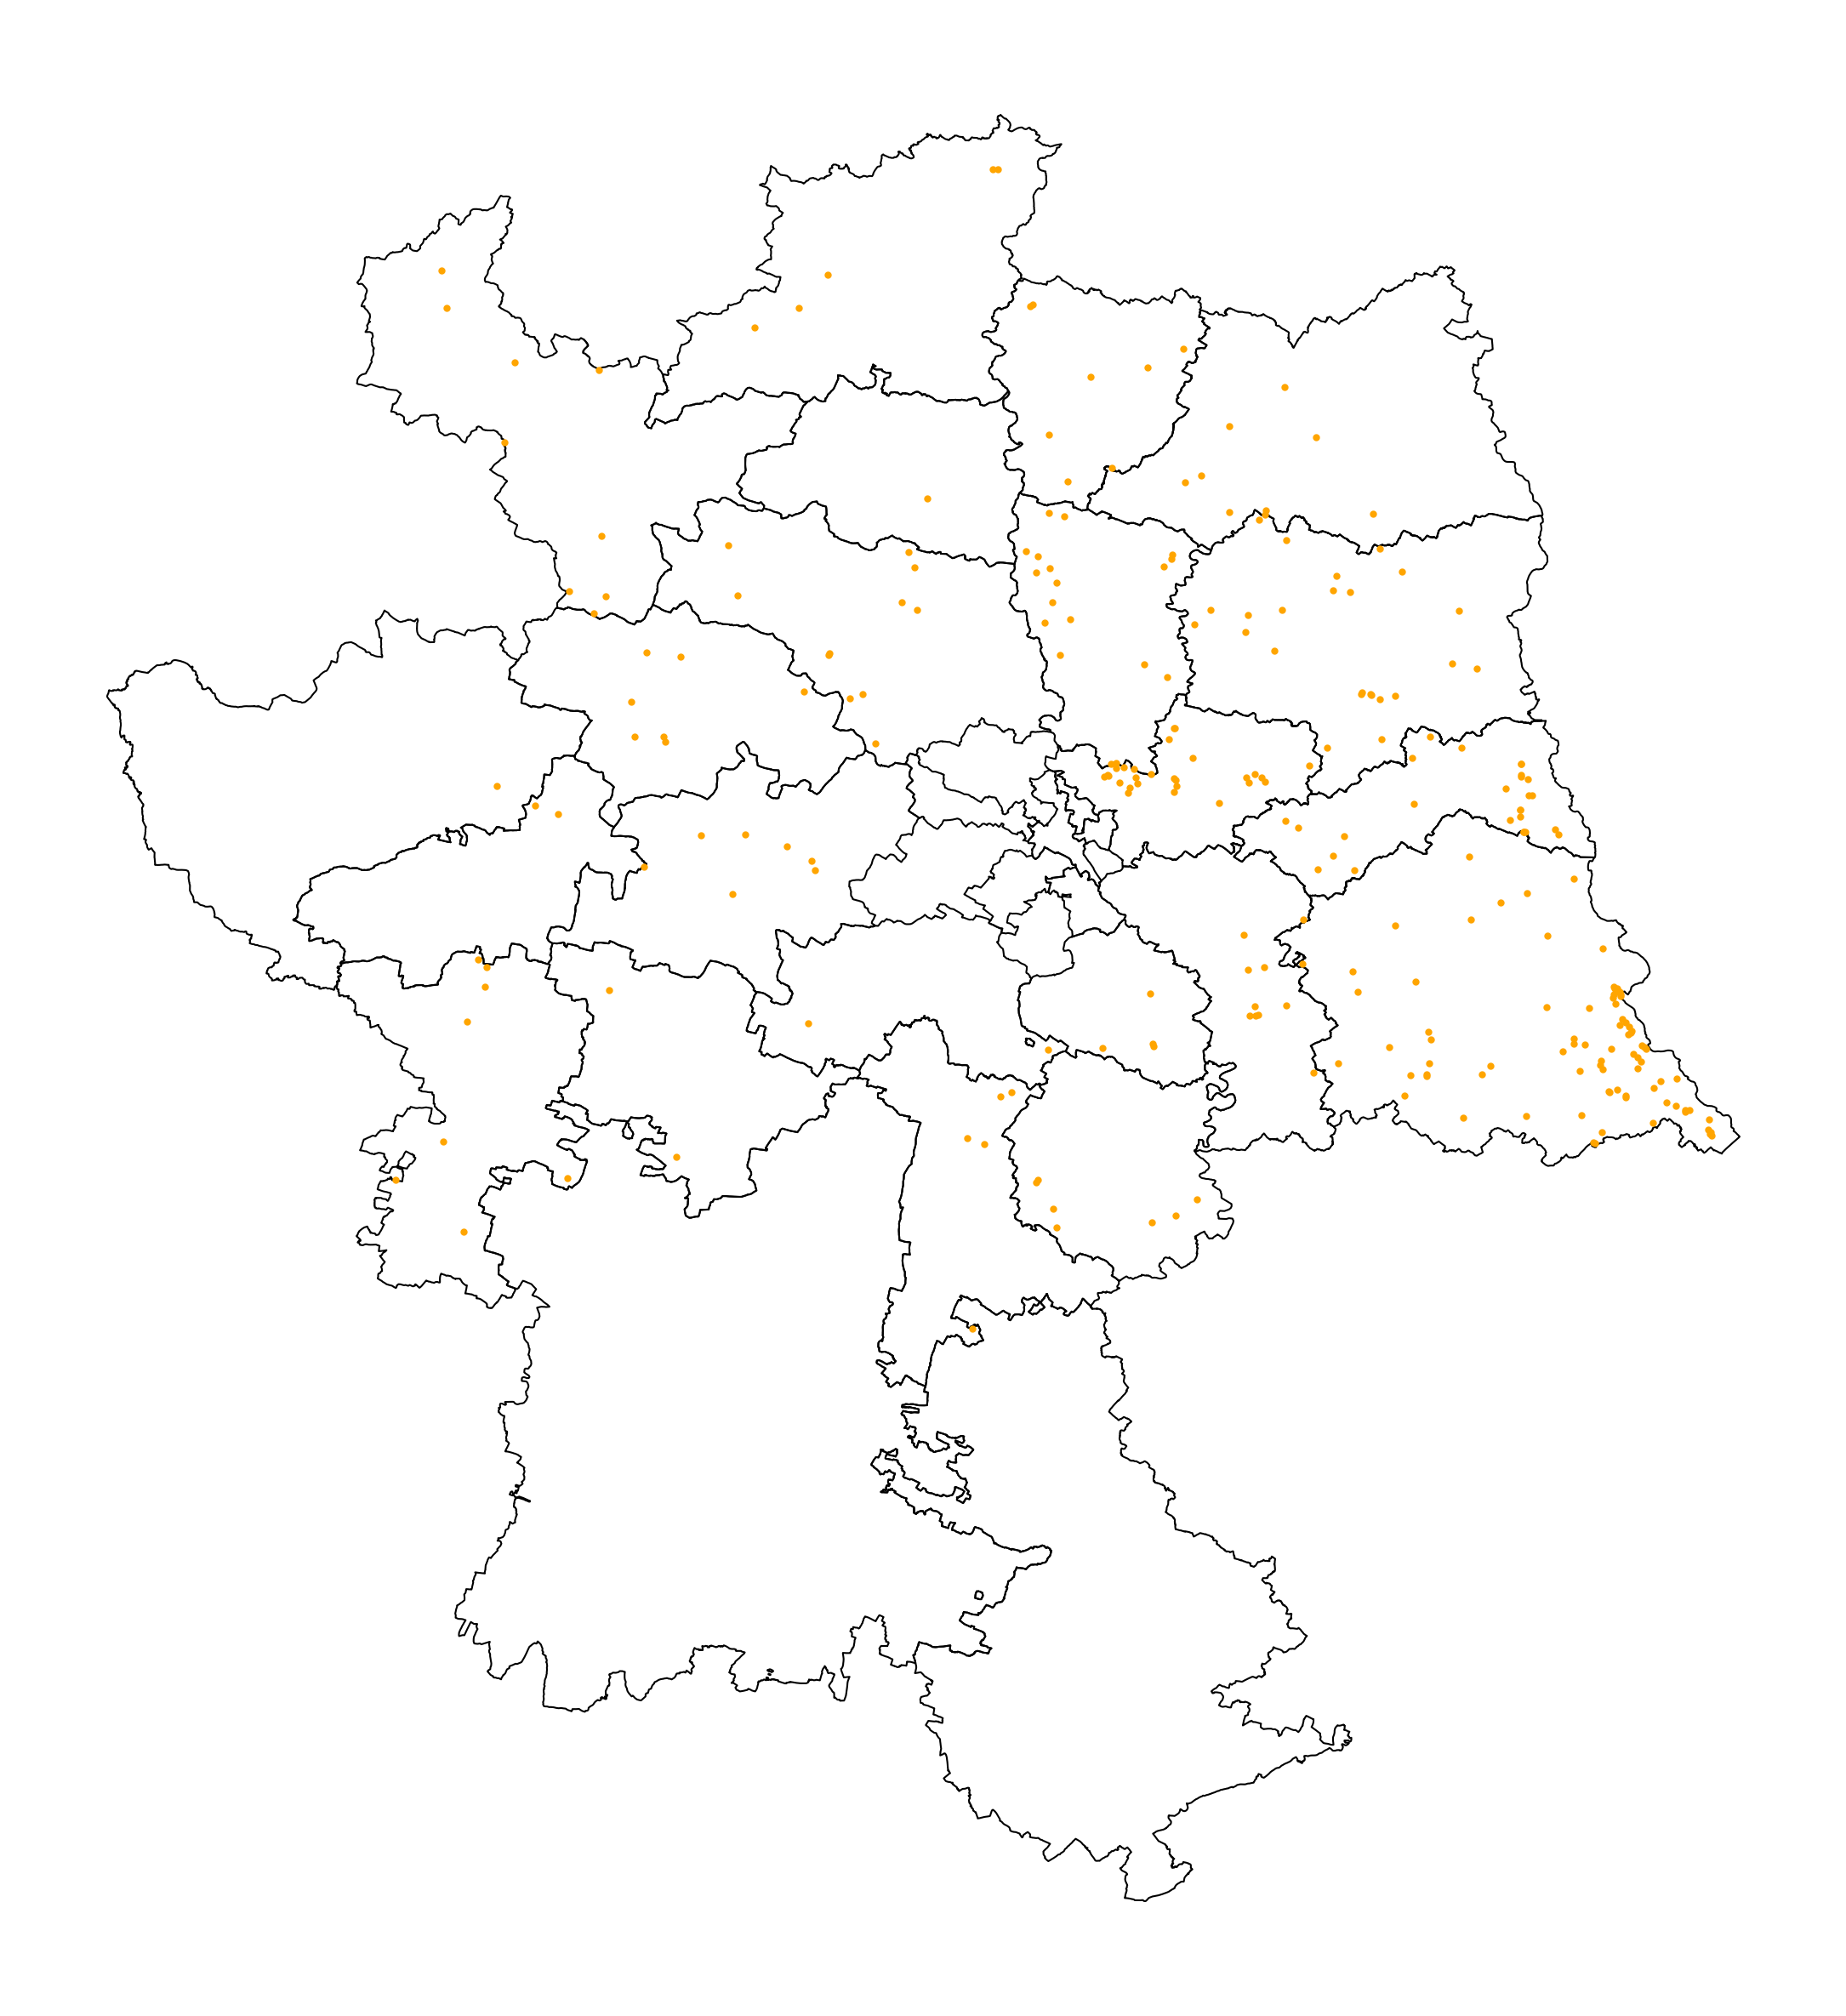

In [22]:
import matplotlib.pyplot as plt
import geopandas as gpd

# Filter the kilns within NCR boundaries using a spatial join
ncr_kilns_gdf = gpd.sjoin(all_kilns_gdf, ncr_df, how="inner")
kiln_tech = "FCBK"
if kiln_tech == "CFCBK":
    filtered_kilns = ncr_kilns_gdf[ncr_kilns_gdf["class_name"] == "CFCBK"]
    print(len(filtered_kilns))
    color = 'red'
elif kiln_tech == "FCBK":
    filtered_kilns = ncr_kilns_gdf[ncr_kilns_gdf["class_name"] == "FCBK"]
    print(len(filtered_kilns))
    color = 'orange'
elif kiln_tech == "Zigzag":
    filtered_kilns = ncr_kilns_gdf[ncr_kilns_gdf["class_name"] == "Zigzag"]
    print(len(filtered_kilns))
    color = 'green'
else:
    raise ValueError("Invalid kiln technology specified!")

fig, ax = plt.subplots(dpi=300, figsize=(10, 10))
ncr_df.plot(ax=ax, color="none", edgecolor="black", linewidth=0.5)
ax.scatter(filtered_kilns.center_lon, filtered_kilns.center_lat, s=1, color=color)
ax.set_aspect("equal")
ax.set_axis_off()
# ax.set_title(f"Brick Kilns in NCR (Technology: {kiln_tech})")
fig.savefig(f"../figures/ncr_kilns_{kiln_tech}.png", bbox_inches="tight", dpi=300)
plt.show()


Number of CFCBK kilns: 22
Number of FCBK kilns: 278
Number of Zigzag kilns: 3111


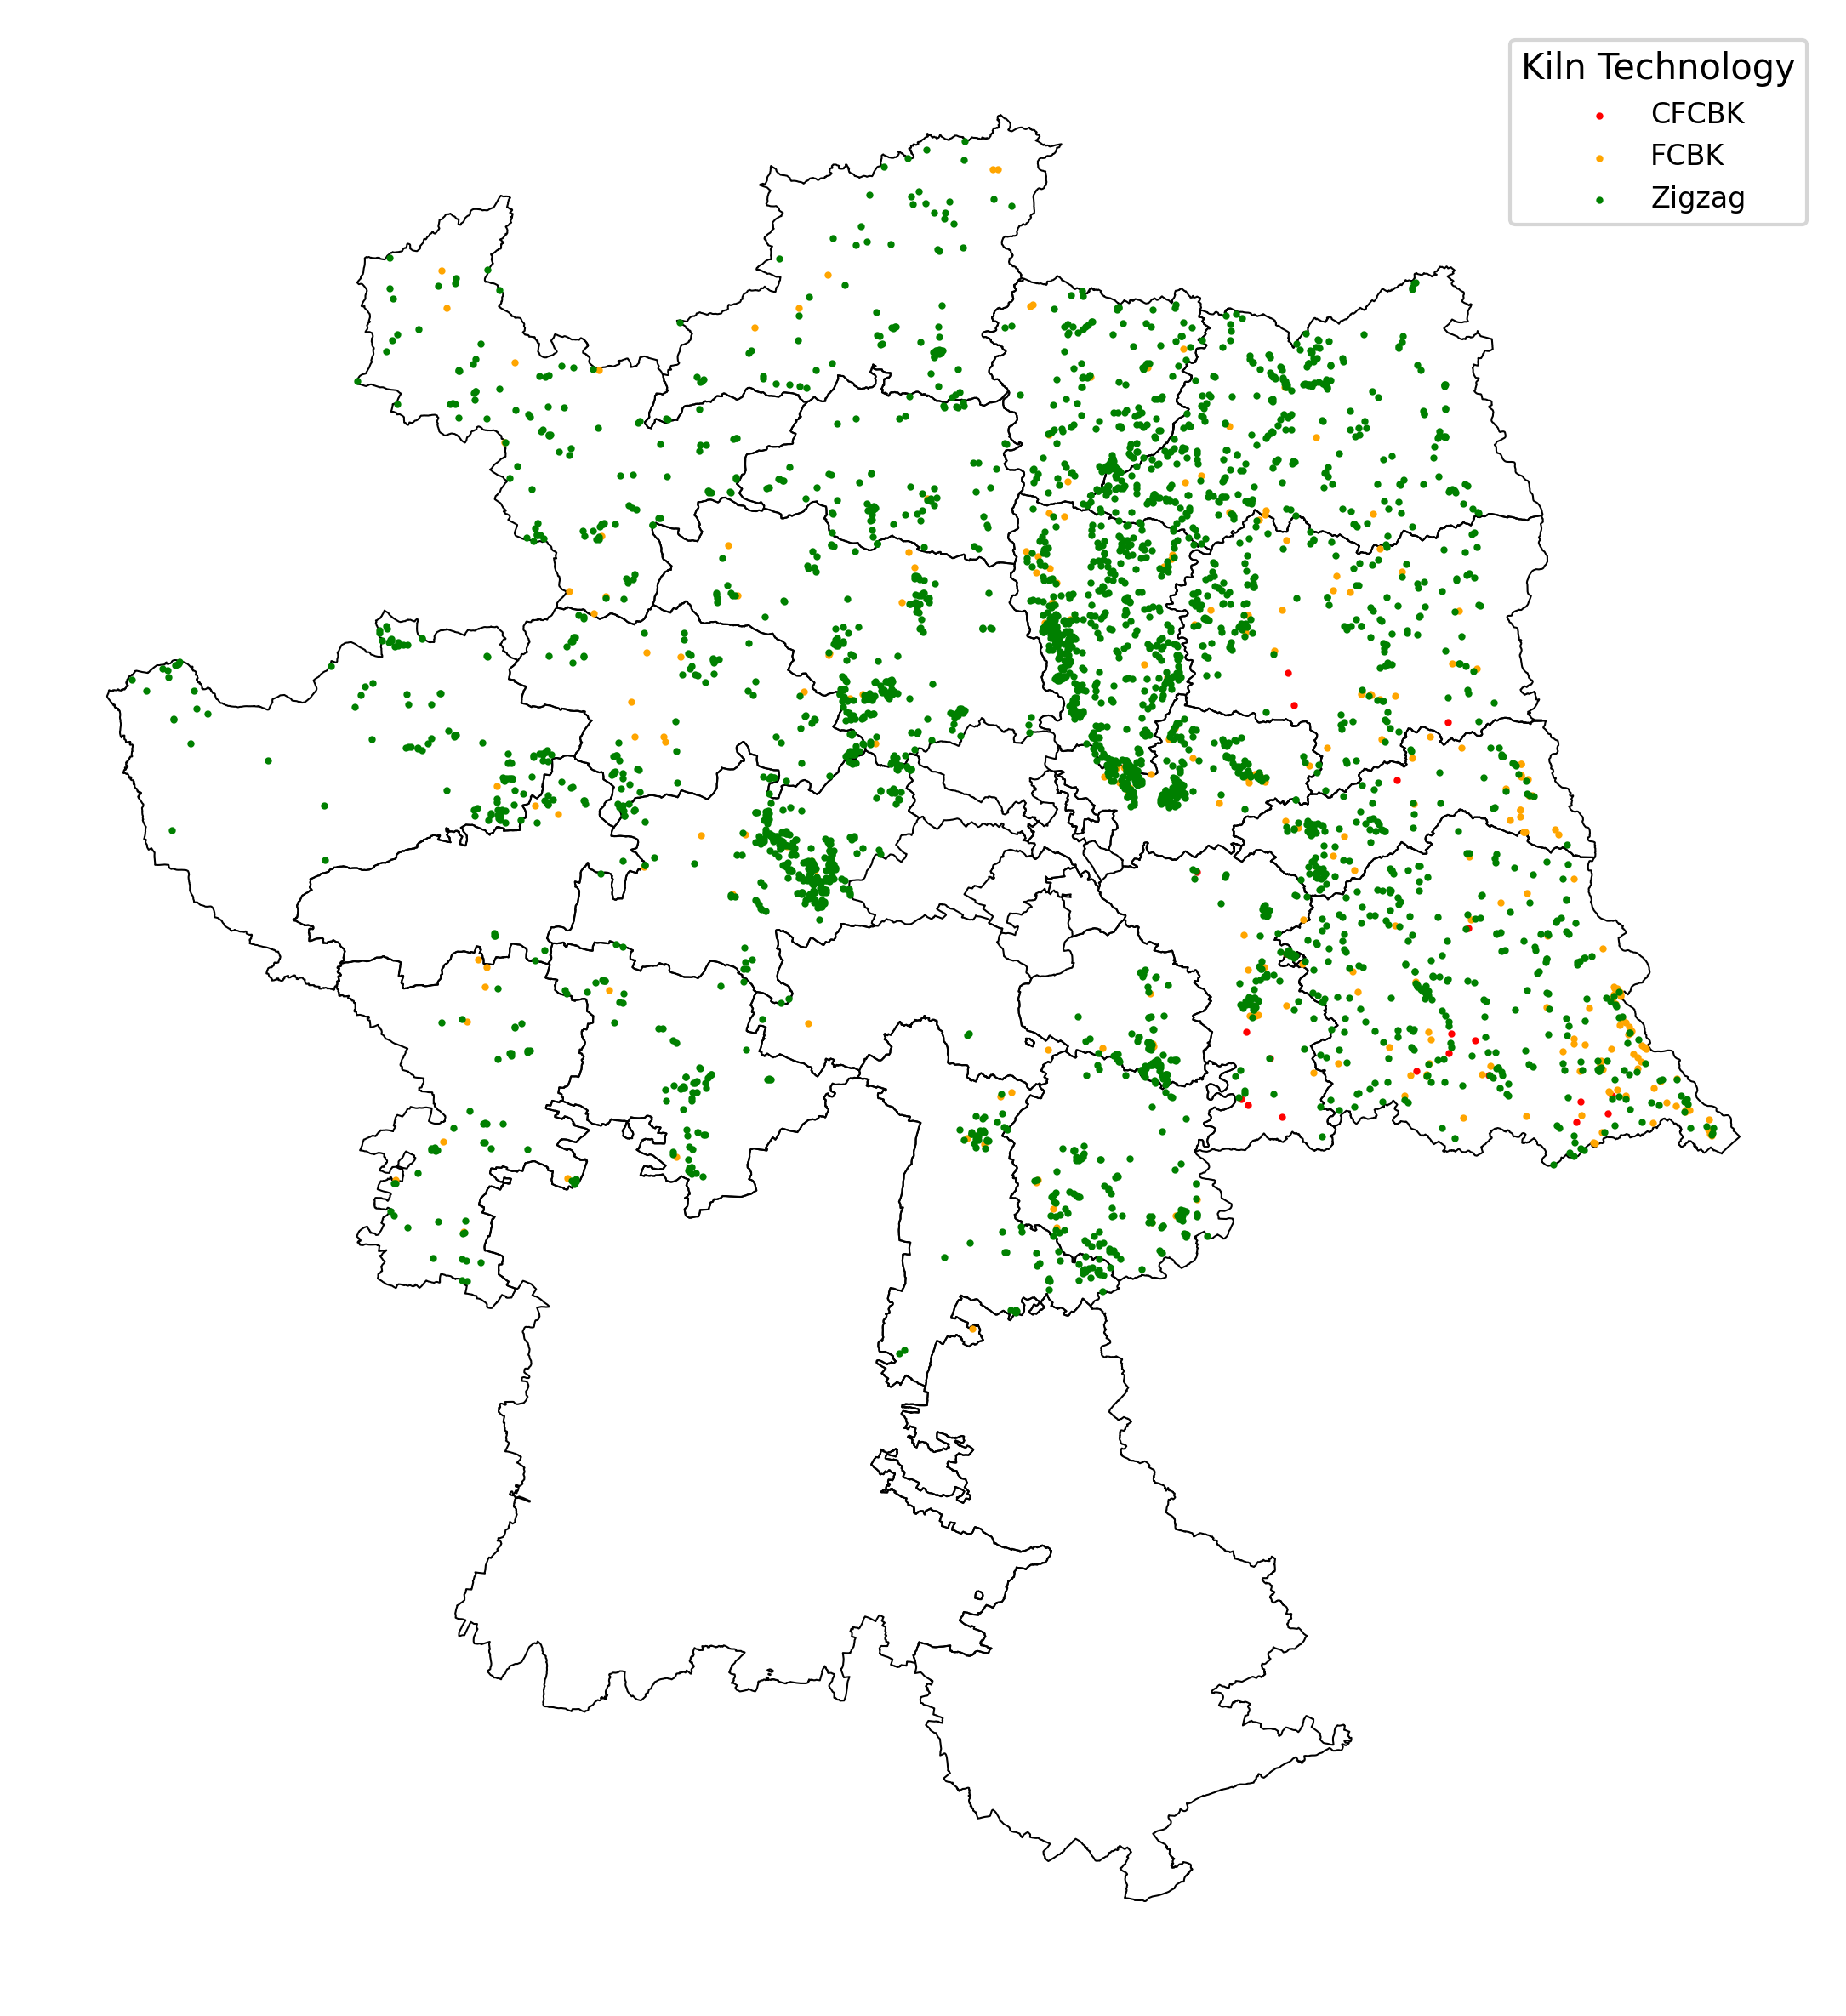

In [23]:
import matplotlib.pyplot as plt
import geopandas as gpd

# Filter the kilns within NCR boundaries using a spatial join
ncr_kilns_gdf = gpd.sjoin(all_kilns_gdf, ncr_df, how="inner")

# Separate kilns by technology
CFCBK_kilns = ncr_kilns_gdf[ncr_kilns_gdf["class_name"] == "CFCBK"]
FCBK_kilns = ncr_kilns_gdf[ncr_kilns_gdf["class_name"] == "FCBK"]
Zigzag_kilns = ncr_kilns_gdf[ncr_kilns_gdf["class_name"] == "Zigzag"]

print(f"Number of CFCBK kilns: {len(CFCBK_kilns)}")
print(f"Number of FCBK kilns: {len(FCBK_kilns)}")
print(f"Number of Zigzag kilns: {len(Zigzag_kilns)}")

# Plot
fig, ax = plt.subplots(dpi=300, figsize=(10, 10))
ncr_df.plot(ax=ax, color="none", edgecolor="black", linewidth=0.5)

# Plot each kiln type with a different color
ax.scatter(CFCBK_kilns.center_lon, CFCBK_kilns.center_lat, s=1, color='red', label="CFCBK")
ax.scatter(FCBK_kilns.center_lon, FCBK_kilns.center_lat, s=1, color='orange', label="FCBK")
ax.scatter(Zigzag_kilns.center_lon, Zigzag_kilns.center_lat, s=1, color='green', label="Zigzag")

# Add legend and formatting
ax.legend(title="Kiln Technology", loc="upper right", fontsize=8)
ax.set_aspect("equal")
ax.set_axis_off()

# Save the figure
fig.savefig("../figures/ncr_all_kilns.png", bbox_inches="tight", dpi=300)

plt.show()


Number of CFCBK kilns: 22
Number of FCBK kilns: 278
Number of Zigzag kilns: 3111


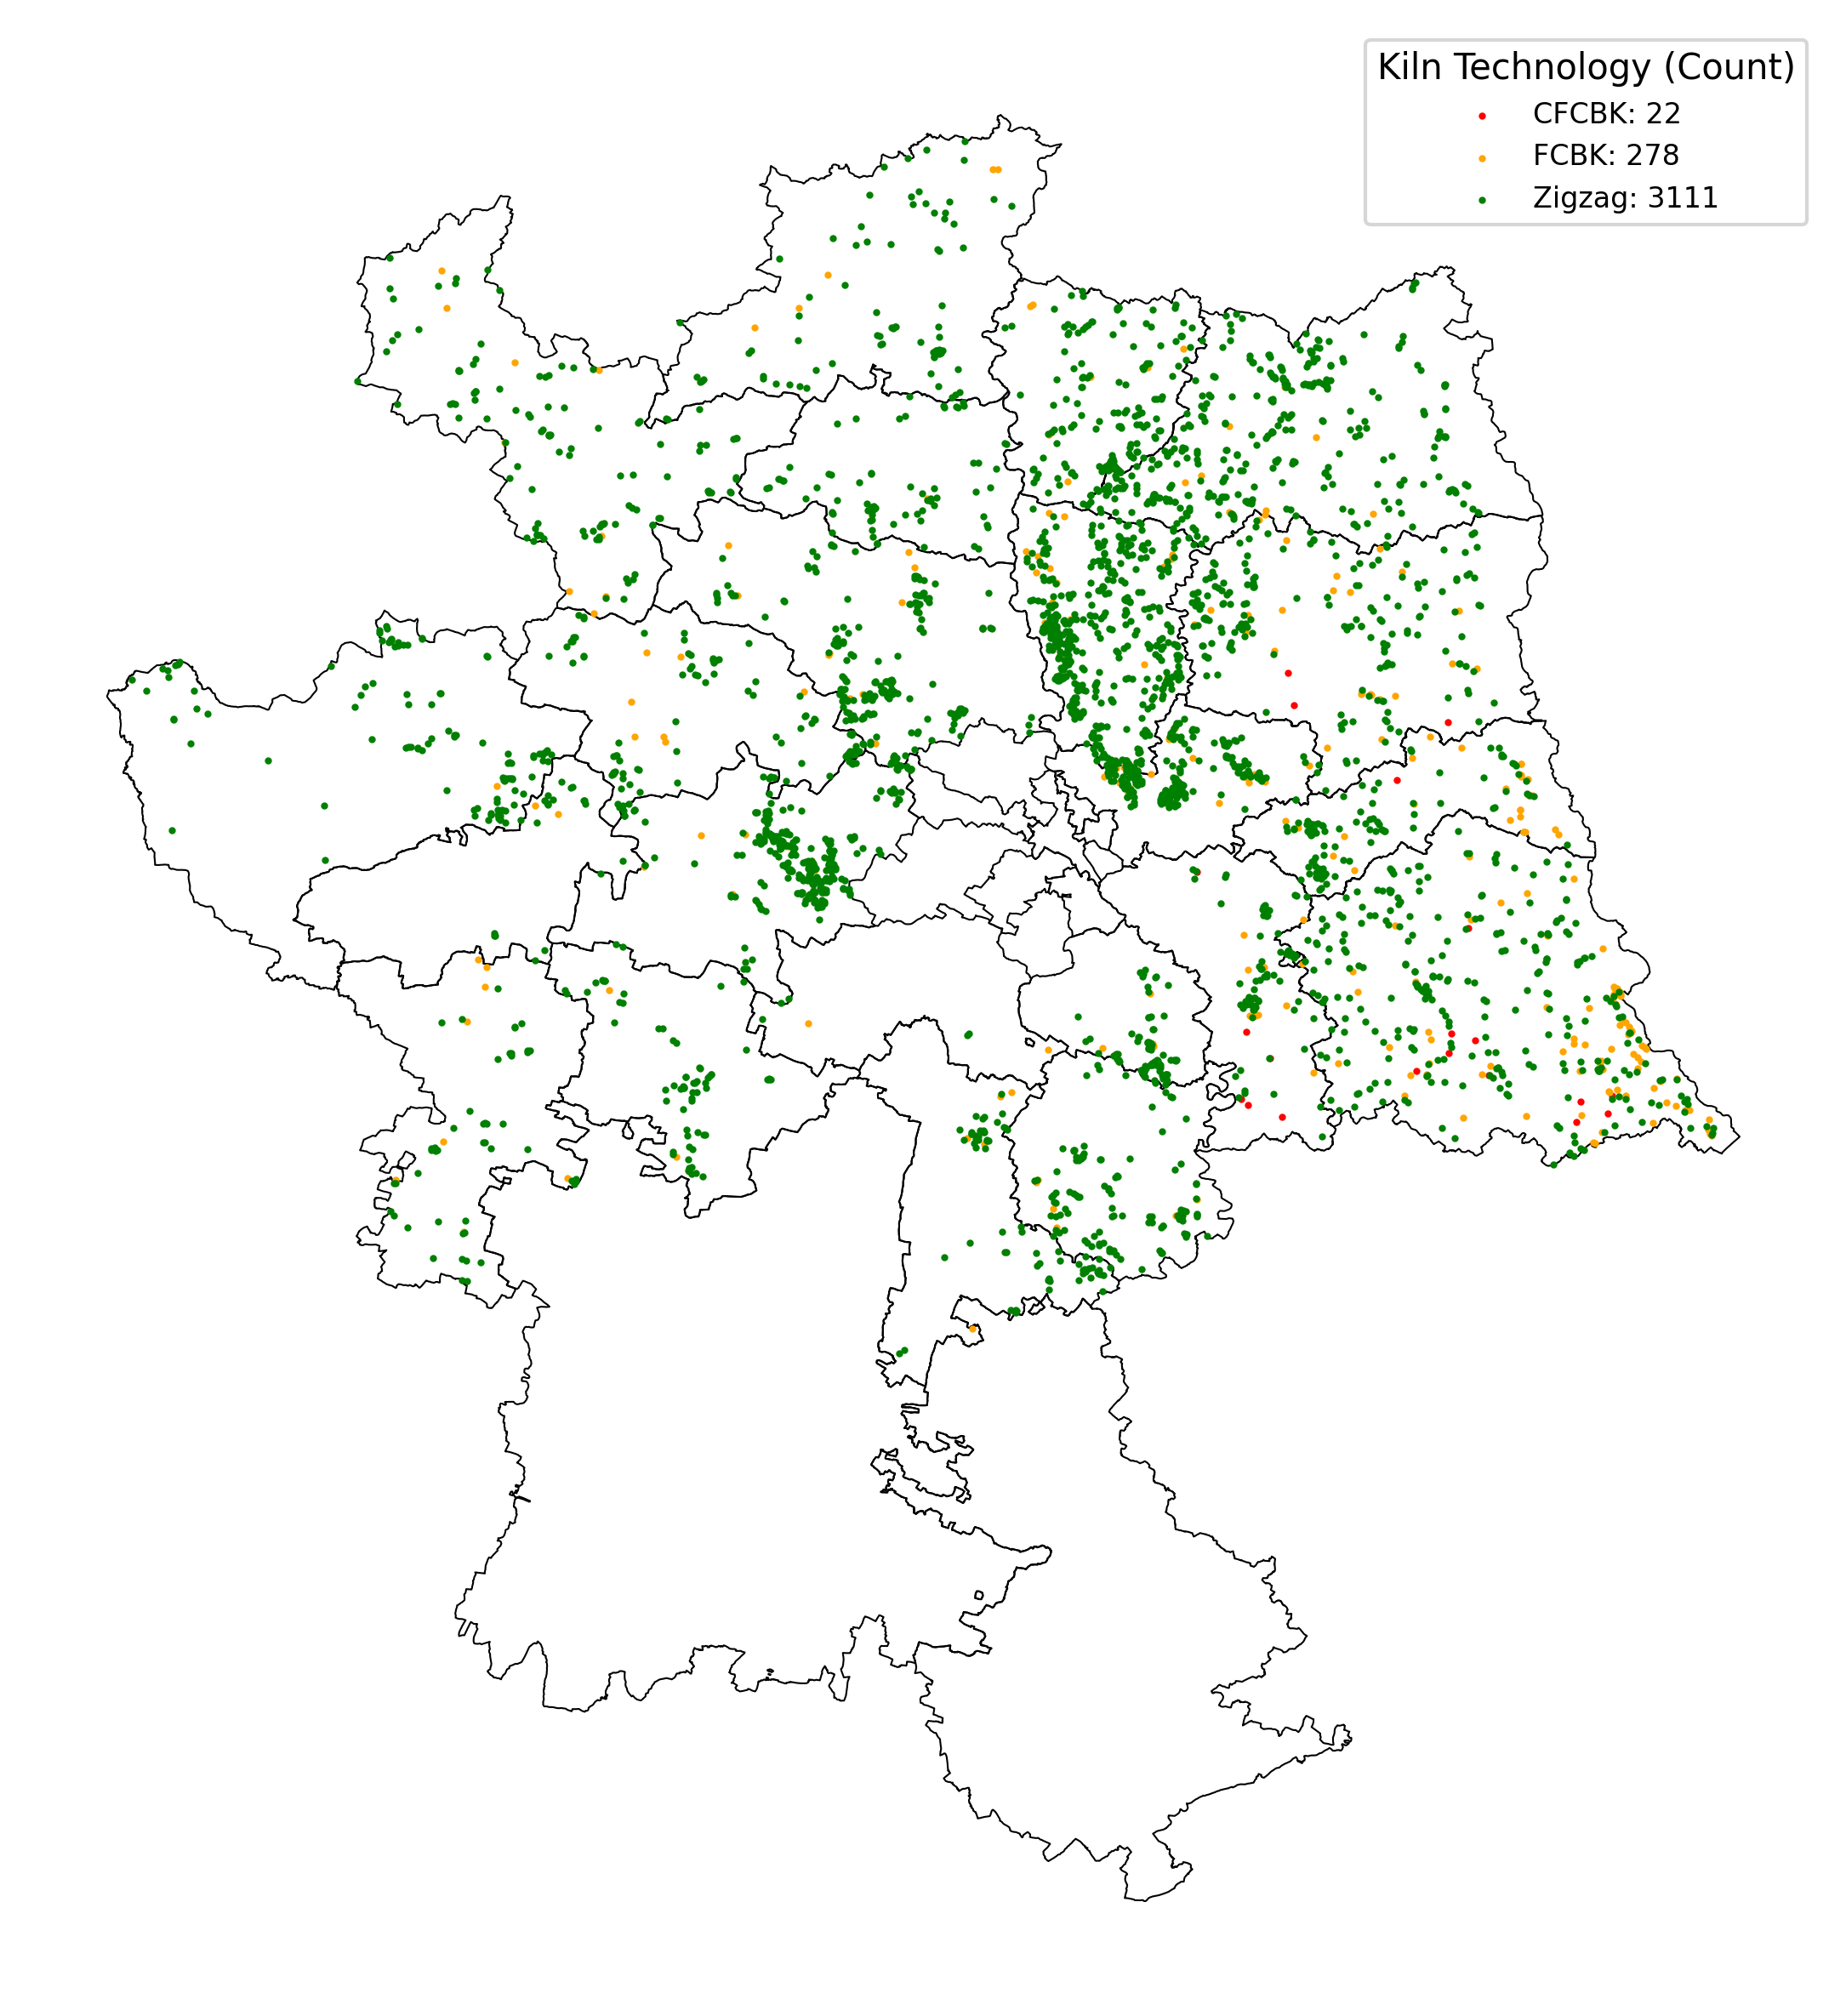

In [24]:
import matplotlib.pyplot as plt
import geopandas as gpd

# Filter the kilns within NCR boundaries using a spatial join
ncr_kilns_gdf = gpd.sjoin(all_kilns_gdf, ncr_df, how="inner")

# Separate kilns by technology and count them
CFCBK_kilns = ncr_kilns_gdf[ncr_kilns_gdf["class_name"] == "CFCBK"]
FCBK_kilns = ncr_kilns_gdf[ncr_kilns_gdf["class_name"] == "FCBK"]
Zigzag_kilns = ncr_kilns_gdf[ncr_kilns_gdf["class_name"] == "Zigzag"]

num_CFCBK = len(CFCBK_kilns)
num_FCBK = len(FCBK_kilns)
num_Zigzag = len(Zigzag_kilns)

# Print counts for confirmation
print(f"Number of CFCBK kilns: {num_CFCBK}")
print(f"Number of FCBK kilns: {num_FCBK}")
print(f"Number of Zigzag kilns: {num_Zigzag}")

# Plot
fig, ax = plt.subplots(dpi=300, figsize=(10, 10))
ncr_df.plot(ax=ax, color="none", edgecolor="black", linewidth=0.5)

# Scatter plot for each kiln type with counts in the legend
scatter_CFCBK = ax.scatter(CFCBK_kilns.center_lon, CFCBK_kilns.center_lat, s=1, color='red', label=f"CFCBK: {num_CFCBK}")
scatter_FCBK = ax.scatter(FCBK_kilns.center_lon, FCBK_kilns.center_lat, s=1, color='orange', label=f"FCBK: {num_FCBK}")
scatter_Zigzag = ax.scatter(Zigzag_kilns.center_lon, Zigzag_kilns.center_lat, s=1, color='green', label=f"Zigzag: {num_Zigzag}")

# Add legend with formatted labels
ax.legend(title="Kiln Technology (Count)", loc="upper right", fontsize=8)

# Formatting the plot
ax.set_aspect("equal")
ax.set_axis_off()

# Save the figure
fig.savefig("../figures/ncr_all_kilns_with_legend_counts.png", bbox_inches="tight", dpi=300)

plt.show()
